In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load Boston Housing Price Data

In [2]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(X, columns = columns)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Outlier Detection

In [5]:
boston_df.shape

(506, 13)

In [6]:
num_rec = boston_df.shape[0]

In [7]:
# Find IQR
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [21]:
# 2 std away from the mean are outliers
#print(boston_df < (Q1 - 2.0 * IQR)) |(boston_df > (Q3 + 2.0 * IQR))

## Find Inlier Data Points

In [19]:
# Inliers - if any of the featue values falling outside the range 
boston_df_out = boston_df[~((boston_df < (Q1 - 2.0 * IQR)) |(boston_df > (Q3 + 2.0 * IQR))).any(axis=1)]

boston_df_out.shape

(316, 13)

## Subtract the number of inliers from the total number of samples to get the number of outliers

In [10]:
num_rec_now = boston_df_out.shape[0]

In [11]:
# Numer of outlier data points
num_rec - num_rec_now

190

## Alternatively we may also get the same result by selecting the Outlier data points as follows.....

In [23]:
# Select the outlier samples

boston_df_out = boston_df[((boston_df < (Q1 - 2.0 * IQR)) |(boston_df > (Q3 + 2.0 * IQR))).any(axis=1)]
boston_df_out.shape[0]

190

## Check for Multicollinearity

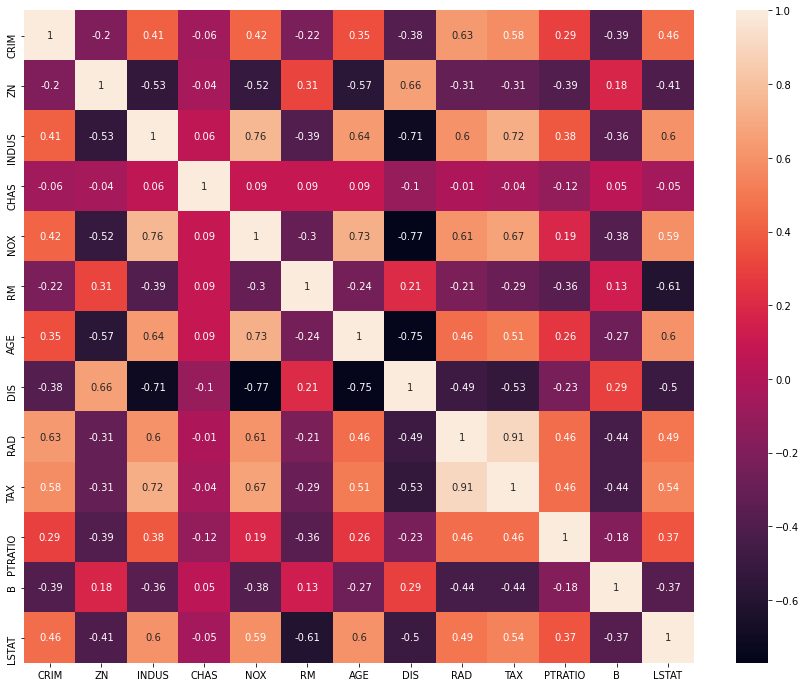

In [12]:
plt.subplots(figsize=(15,12))
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. 

These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. 

Same goes for the features DIS and AGE which have a correlation of -0.75.

## Linear Feature Dependence


To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. 


In [13]:
df1 = pd.DataFrame(X, columns=columns)
df2 = pd.DataFrame(y, columns=['MEDV'])

In [14]:
df3 = pd.concat([df1, df2], axis=1)

In [15]:
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


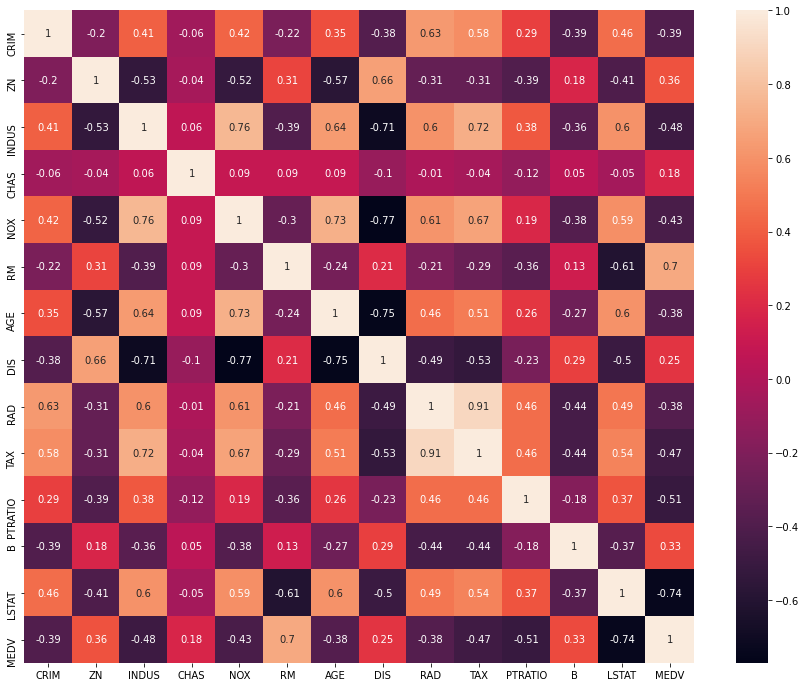

In [16]:
plt.subplots(figsize=(15,12))
correlation_matrix = df3.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

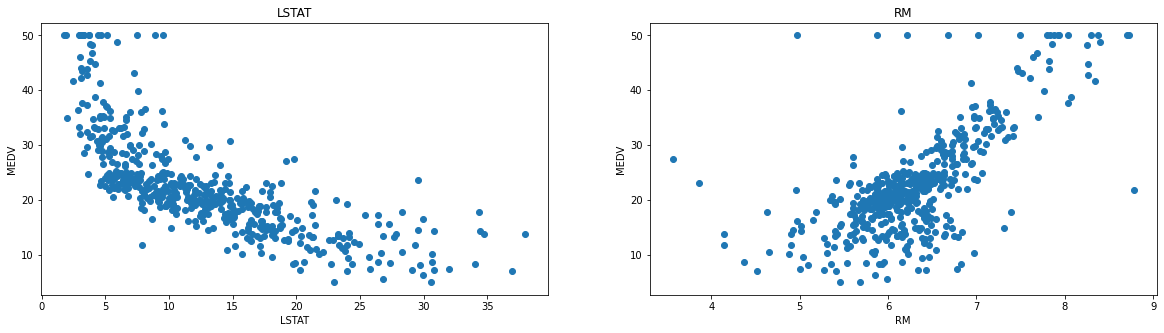

In [17]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df3['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df3[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')